In [121]:
import poetrytools as pt
from poetrytools import guess_metre, tokenize, count_syllables
import gzip, json
import random
import pandas as pd
from tqdm.notebook import tqdm
from time import sleep
import matplotlib.pyplot as plt
import pronouncing
from collections import defaultdict
import re

# Frakenpoem Demo

Use the data provided by [Allison Parrish's repo](https://github.com/aparrish/gutenberg-poetry-corpus/blob/master/quick-experiments.ipynb) and code to unpack json. 

The goal: we want a dataframe which has the lines, the number of syllables the line has, and the meter of the line.

In [168]:
import gzip, json
data = []
for line in gzip.open("gutenberg-poetry-v001.ndjson.gz"):
    data.append(json.loads(line.strip()))

In [169]:
# 3 million lines of poetry data
len(data)

3085117

In [170]:
# a sample
indexes = [random.randint(1, 3000000) for i in range(5)]
for i in range(len(indexes)):
    print(data[indexes[i]]['s'], '\n')

It dies upon her heart, 

presentable. But men of sense know better than so to waste 

Our only playmates little fears-- 

Dazzling command and rich dominion, 

Tempers the fates of human race above; 



In [171]:
df = pd.DataFrame(data)
df = df.rename({'s':'text'}, axis = 'columns')
df = df.drop(['gid'], axis = 1)
df.head()

,text
0,The Song of Hiawatha is based on the legends a...
1,"many North American Indian tribes, but especia..."
2,"Ojibway Indians of northern Michigan, Wisconsi..."
3,"They were collected by Henry Rowe Schoolcraft,..."
4,"Schoolcraft married Jane, O-bah-bahm-wawa-ge-z..."


In [172]:
meters = []
syllables = []
# for i in tqdm(range(len(df))):
#     sleep(0.01)
#     meters.append(guess_metre(tokenize(df.text[i]))[3])
#     syllables.append(count_syllables(df.text[i]))
tqdm.pandas(desc="progress")

def get_meters(x):
    try:
        return guess_metre(tokenize(x))[3]
    except:
        return "null"
    
def get_syllables(x):
    try:
        return count_syllables(x)
    except:
        return "null"

df['meter'] = df['text'].progress_apply(lambda x: get_meters(x))
df['syllables'] = df['text'].progress_apply(lambda x: get_syllables(x))

/Users/211540/Library/Python/3.7/lib/python/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [173]:
print("percentage of null meters: ", len(df[df.meter=="null"])/len(df))
print("percentage of null syllables: ", len(df[df.syllables=="null"])/len(df))

percentage of null meters:  0.00022981300222973716
percentage of null syllables:  0.0


/usr/local/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [174]:
df.head()

,text,meter,syllables
0,The Song of Hiawatha is based on the legends a...,iambic trimeter,17
1,"many North American Indian tribes, but especia...",trochaic tetrameter,19
2,"Ojibway Indians of northern Michigan, Wisconsi...",trochaic tetrameter,19
3,"They were collected by Henry Rowe Schoolcraft,...",trochaic tetrameter,17
4,"Schoolcraft married Jane, O-bah-bahm-wawa-ge-z...",iambic trimeter,15


In [125]:
by_rhyming_part = defaultdict(lambda: defaultdict(list))
for line in tqdm(df.text):
#     if not(32 < len(text) < 48): # only use lines of uniform lengths
#         continue
    match = re.search(r'(\b\w+\b)\W*$', line)
    if match:
        last_word = match.group()
        pronunciations = pronouncing.phones_for_word(last_word)
        if len(pronunciations) > 0:
            rhyming_part = pronouncing.rhyming_part(pronunciations[0])
            # group by rhyming phones (for rhymes) and words (to avoid duplicate words)
            by_rhyming_part[rhyming_part][last_word.lower()].append(line)

In [152]:
match = re.search(r'(\b\w+\b)\W*$', df.text[0])
last_word = match.group()
pronunciations = pronouncing.phones_for_word(last_word)
print(pronunciations)
rhyming_part = pronouncing.rhyming_part(pronunciations[0])
print(rhyming_part)

['AH1 V']
AH1 V


In [153]:
# syllables: majority lie between 5 and 15

def define_structure():
    length = random.randint(4, 10)
    line_breaks = random.randint(1, length-1)
    return length, line_breaks

def pick_first_line(df):
    index = random.randint(1, len(df))
    return (index, df.text[index])

def get_rhyme_dict(pruned_df):
    by_rhyming_part = defaultdict(lambda: defaultdict(list))
    for line in tqdm(pruned_df.text):
        match = re.search(r'(\b\w+\b)\W*$', line)
        if match:
            last_word = match.group()
            pronunciations = pronouncing.phones_for_word(last_word)
            if len(pronunciations) > 0:
                rhyming_part = pronouncing.rhyming_part(pronunciations[0])
                # group by rhyming phones (for rhymes) and words (to avoid duplicate words)
                by_rhyming_part[rhyming_part][last_word.lower()].append(line)     
    return by_rhyming_part

def write_poem(df, rhymes):
    length, line_breaks = define_structure()
    
    index, first_line = pick_first_line()
    
    # prune the dataframe so that we restrict the number of syllables and the meter
    pruned_df = df[df.meter == df.meter[i]]
    pruned_df = df[(df.syllables > df.syllables[i]-3) & df.syllables[i]+2]
    
    random_rhyming_part = random.choice(list(by_rhyming_part.keys()))

In [155]:
# random_rhyming_part = random.choice(list(by_rhyming_part.keys()))
# by_rhyming_part[random_rhyming_part]

p = pronouncing.phones_for_word

defaultdict(list,
            {'groundwork': ['To Confucius, as has been already stated, is due that groundwork'],
             'handiwork': ['I hold it grateful that their handiwork',
              'Each with his native handiwork',
              "The not incurious in God's handiwork",
              "The not-incurious in God's handiwork"],
             'patchwork': ['The singer bowed his brow majestic, * searching that patchwork'],
             'needlework': ['immediately; wait--for I would not have my skill in needlework',
              'immediately; wait--for I would not have my skill in needlework',
              'Employed at needlework'],
             'network': ['This silver-tissued network',
              'Its gray and purple network']})

In [193]:
def get_rhyme_dict(pruned_df):
    by_rhyming_part = defaultdict(lambda: defaultdict(list))
    for line in tqdm(pruned_df.text):
        match = re.search(r'(\b\w+\b)\W*$', line)
        if match:
            last_word = match.group()
            pronunciations = pronouncing.phones_for_word(last_word)
            if len(pronunciations) > 0:
                rhyming_part = pronouncing.rhyming_part(pronunciations[0])
                # group by rhyming phones (for rhymes) and words (to avoid duplicate words)
                by_rhyming_part[rhyming_part][last_word.lower()].append(line)
                
    return by_rhyming_part

In [194]:
r = get_rhyme_dict(pruned_df)

In [198]:
r['AH1 M Z']

defaultdict(list,
            {'comes': ['And rest can never dwell, hope never comes',
              'In secret, riding through the Air she comes',
              'So on he fares, and to the border comes',
              'And rest can never dwell, hope never comes',
              'So on he fares, and to the border comes',
              'And grass unbidden. See how from Tmolus comes',
              'I learnt at Robbo Park, and if it comes',
              'But for downright solid goodness that comes',
              'And every feathered playmate comes',
              'From out their proper matter. Thus it comes',
              'Of whom, chief leader to do battle, comes',
              'Aught that may block and check it so it comes',
              'Besides we feel that mind to being comes',
              'Which is itself a nothing: for there comes',
              'From briny ocean, as from lands it comes',
              'Breathing and sounding beauteous battle, comes',
              'Instruc

In [176]:
df.groupby(['meter']).count()

,text,syllables
meter,,
iambic pentameter,599160,599160
iambic tetrameter,393476,393476
iambic trimeter,891370,891370
null,709,709
trochaic pentameter,253590,253590
trochaic tetrameter,946812,946812


[]

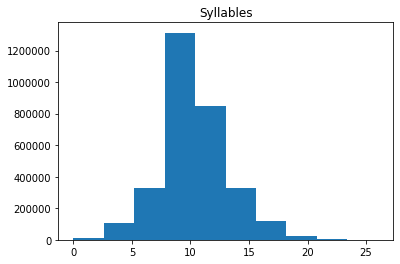

In [190]:
plt.hist(df.syllables)
plt.title("Syllables")
plt.plot()